In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
train_df = pd.read_csv(r"C:\Users\sande\OneDrive\Desktop\MMSO\Machine Learning\train.csv")

In [4]:
train_df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [5]:
Nan_values = train_df[train_df.isnull().any(axis=1)]

In [6]:
Nan_values

,x,y
213,3530.157369,NaN


In [7]:
df = train_df.drop(213)  # Dropping the Nan value from the data set

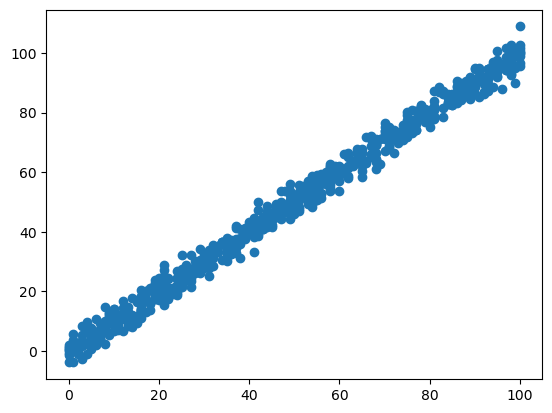

In [8]:
plt.scatter(df.x,df.y)  #Scatter plot of all the data point in our training data set

In [9]:
# Performing gradient descent algorithim to optimize the sqaured error function Mean Squared Error Function = ((Y - (a*X+b))**2)
def grad_desc(a_val,b_val,df,alpha):
    a_grad = 0
    b_grad  = 0 
    n = len(df)
    for i in range(n):
        x1 = df.iloc[i].x
        x2 = df.iloc[i].y
        a_grad = a_grad + -(2/n)*x1*(x2-(a_val*x1+b_val))# derivative of squared mean error functin with respect to a 
        b_grad = b_grad + -(2/n)*(x2-(a_val*x1+b_val))# derivatibe of squared mean error function with respect to b
    a = a_val -a_grad*alpha
    b = b_val -b_grad*alpha
    return a, b

In [10]:
a = 0 # Initial Vlue of a 
b= 0 # Initial Value of b
it = 90 # Iterations
alpha = 0.00001 # Step length 
for i in range (it):
    a,b = grad_desc(a,b,df,alpha)
print(a,b)

0.9968409870811714 0.01487927194137477


In [11]:
x = df.x

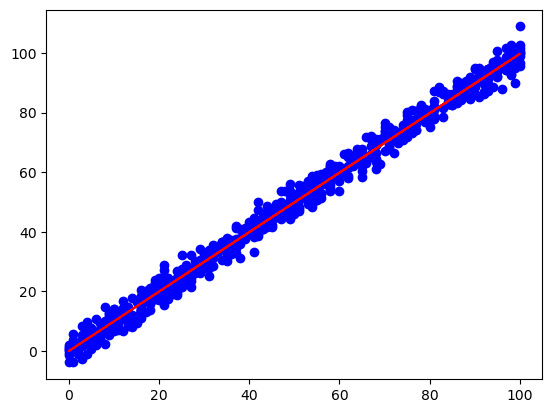

In [27]:
y = a*x + b
plt.plot(x,y,color = "red")
plt.scatter(df.x,df.y,color = 'blue')
plt.show()

In [13]:
test_df = pd.read_csv(r"C:\Users\sande\OneDrive\Desktop\MMSO\Machine Learning\test.csv")

In [14]:
x_test = test_df.x
y_test = test_df.y


In [15]:
y_reg = a*x_test + b

In [16]:
test_df['Y_val'] = y_reg
test_df['dev'] = abs(test_df['y']-test_df['Y_val'])

In [17]:
test_df

,x,y,Y_val,dev
0,77,79.775152,76.771635,3.003517
1,21,23.177279,20.948540,2.228739
2,22,25.609262,21.945381,3.663881
3,20,17.857388,19.951699,2.094311
4,36,41.849864,35.901155,5.948710
...,...,...,...,...
295,71,68.545888,70.790589,2.244701
296,46,47.334876,45.869565,1.465312
297,55,54.090637,54.841134,0.750497
298,62,63.297171,61.819020,1.478150


In [18]:
dev = test_df.dev

In [19]:
rmse_err = np.sqrt(np.mean((dev)**2)) # Squared Root Mean Error 
accu = 1 - rmse_err/np.mean(y_test)  # Accuracy 
print(rmse_err,accu)
# Rmse is 3.095 and Accuracy is 93.95 %

3.0957817759961537 0.9395414766786486


In [20]:
error = np.mean(dev)

In [21]:
y_reg = a*x_test + b + error

In [22]:
y_reg

0      79.203410
1      23.380315
2      24.377156
3      22.383474
4      38.332929
         ...    
295    73.222364
296    48.301339
297    57.272908
298    64.250795
299    49.298180
Name: x, Length: 300, dtype: float64

In [23]:
test_df['Y_val'] = y_reg
test_df['dev'] = abs(test_df['y']-test_df['Y_val'])

In [24]:
test_df

,x,y,Y_val,dev
0,77,79.775152,79.203410,0.571742
1,21,23.177279,23.380315,0.203036
2,22,25.609262,24.377156,1.232106
3,20,17.857388,22.383474,4.526085
4,36,41.849864,38.332929,3.516935
...,...,...,...,...
295,71,68.545888,73.222364,4.676476
296,46,47.334876,48.301339,0.966463
297,55,54.090637,57.272908,3.182271
298,62,63.297171,64.250795,0.953624


In [25]:
np.mean(dev)

2.4317745969363505

In [26]:
error

2.4317745969363505